In [1]:
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import torch
from torch.autograd import Variable
import numpy as np
import torch.functional as F
import torch.nn.functional as F
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import nltk
# nltk.download()

In [2]:
def preprocess(sentence):
    
    wordnet_lemmatizer = WordNetLemmatizer()
    sentence = stemmer.stem(sentence)     
    sentence = sentence.lower()     
    tokenizer = RegexpTokenizer(r'\w+')      
    tokens = tokenizer.tokenize(sentence)
    filtered_words = [wordnet_lemmatizer.lemmatize(word) for word in tokens]
    filtered_words = [w for w in tokens if not w in stopwords.words('english')] 
    filtered_words = [c for c in filtered_words if not c.isdigit()]    
    return " ".join(filtered_words)

In [3]:
df = pd.read_csv('bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
dataset = df
dataset = dataset[dataset.category == 'tech']
dataset.index = np.arange(len(dataset))
dataset = dataset[:30]
print(dataset.head())
print(len(dataset))

  category                                               text
0     tech  tv future in the hands of viewers with home th...
1     tech  games maker fights for survival one of britain...
2     tech  security warning over  fbi virus  the us feder...
3     tech  halo 2 heralds traffic explosion the growing p...
4     tech  mobile audio enters new dimension as mobile ph...
30


In [5]:
corpus = dataset['text']
print(corpus)

0     tv future in the hands of viewers with home th...
1     games maker fights for survival one of britain...
2     security warning over  fbi virus  the us feder...
3     halo 2 heralds traffic explosion the growing p...
4     mobile audio enters new dimension as mobile ph...
5     mobile gig aims to rock 3g forget about going ...
6     firefox browser takes on microsoft microsoft s...
7     gamers snap up new sony psp gamers have bought...
8     pandas benefit from wireless net the world s d...
9     broadband in the uk growing fast high-speed ne...
10    microsoft gets the blogging bug software giant...
11    tech helps disabled speed demons an organisati...
12    loyalty cards idea for tv addicts viewers coul...
13    web radio takes spanish rap global spin the ra...
14    screensaver tackles spam websites net users ar...
15    ibm frees 500 software patents computer giant ...
16    seamen sail into biometric future the luxury c...
17    europe backs digital tv lifestyle how peop

In [6]:
tokenized_corpus = []
stemmer = PorterStemmer()
for i in range(len(corpus)):
    sentence = preprocess(corpus[i])
    tokenized_corpus.append(word_tokenize((sentence)))
print(tokenized_corpus)

[['tv', 'future', 'hands', 'viewers', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'digital', 'video', 'recorders', 'moving', 'living', 'room', 'way', 'people', 'watch', 'tv', 'radically', 'different', 'five', 'years', 'time', 'according', 'expert', 'panel', 'gathered', 'annual', 'consumer', 'electronics', 'show', 'las', 'vegas', 'discuss', 'new', 'technologies', 'impact', 'one', 'favourite', 'pastimes', 'us', 'leading', 'trend', 'programmes', 'content', 'delivered', 'viewers', 'via', 'home', 'networks', 'cable', 'satellite', 'telecoms', 'companies', 'broadband', 'service', 'providers', 'front', 'rooms', 'portable', 'devices', 'one', 'talked', 'technologies', 'ces', 'digital', 'personal', 'video', 'recorders', 'dvr', 'pvr', 'set', 'top', 'boxes', 'like', 'us', 'tivo', 'uk', 'sky', 'system', 'allow', 'people', 'record', 'store', 'play', 'pause', 'forward', 'wind', 'tv', 'programmes', 'want', 'essentially', 'technology', 'allows', 'much', 'personalised', 'tv', 'al

In [7]:
vocabulary = []
for sentence in tokenized_corpus:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)

word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}

vocabulary_size = len(vocabulary)
print(vocabulary)

['tv', 'future', 'hands', 'viewers', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'digital', 'video', 'recorders', 'moving', 'living', 'room', 'way', 'people', 'watch', 'radically', 'different', 'five', 'years', 'time', 'according', 'expert', 'panel', 'gathered', 'annual', 'consumer', 'electronics', 'show', 'las', 'vegas', 'discuss', 'new', 'technologies', 'impact', 'one', 'favourite', 'pastimes', 'us', 'leading', 'trend', 'programmes', 'content', 'delivered', 'via', 'networks', 'cable', 'satellite', 'telecoms', 'companies', 'broadband', 'service', 'providers', 'front', 'rooms', 'portable', 'devices', 'talked', 'ces', 'personal', 'dvr', 'pvr', 'set', 'top', 'boxes', 'like', 'tivo', 'uk', 'sky', 'system', 'allow', 'record', 'store', 'play', 'pause', 'forward', 'wind', 'want', 'essentially', 'technology', 'allows', 'much', 'personalised', 'also', 'built', 'sets', 'big', 'business', 'japan', 'slower', 'take', 'europe', 'lack', 'programming', 'adverts', 'forget', 'a

In [8]:
word2idx


{'tv': 0,
 'future': 1,
 'hands': 2,
 'viewers': 3,
 'home': 4,
 'theatre': 5,
 'systems': 6,
 'plasma': 7,
 'high': 8,
 'definition': 9,
 'tvs': 10,
 'digital': 11,
 'video': 12,
 'recorders': 13,
 'moving': 14,
 'living': 15,
 'room': 16,
 'way': 17,
 'people': 18,
 'watch': 19,
 'radically': 20,
 'different': 21,
 'five': 22,
 'years': 23,
 'time': 24,
 'according': 25,
 'expert': 26,
 'panel': 27,
 'gathered': 28,
 'annual': 29,
 'consumer': 30,
 'electronics': 31,
 'show': 32,
 'las': 33,
 'vegas': 34,
 'discuss': 35,
 'new': 36,
 'technologies': 37,
 'impact': 38,
 'one': 39,
 'favourite': 40,
 'pastimes': 41,
 'us': 42,
 'leading': 43,
 'trend': 44,
 'programmes': 45,
 'content': 46,
 'delivered': 47,
 'via': 48,
 'networks': 49,
 'cable': 50,
 'satellite': 51,
 'telecoms': 52,
 'companies': 53,
 'broadband': 54,
 'service': 55,
 'providers': 56,
 'front': 57,
 'rooms': 58,
 'portable': 59,
 'devices': 60,
 'talked': 61,
 'ces': 62,
 'personal': 63,
 'dvr': 64,
 'pvr': 65,
 'set

In [9]:
window_size = 2
idx_pairs = []
# for each sentence
for sentence in tokenized_corpus:
    indices = [word2idx[word] for word in sentence]
    # for each word, threated as center word
    for center_word_pos in range(len(indices)):
        # for each window position
        for w in range(-window_size, window_size + 1):
            context_word_pos = center_word_pos + w
            # make soure not jump out sentence
            if context_word_pos < 0 or context_word_pos >= len(indices) or center_word_pos == context_word_pos:
                continue
            context_word_idx = indices[context_word_pos]
            idx_pairs.append((indices[center_word_pos], context_word_idx))

idx_pairs = np.array(idx_pairs) # it will be useful to have this as numpy array

In [10]:
idx_pairs[:10]
print(len(idx_pairs))

31368


In [11]:
def get_input_layer(word_idx):
    x = torch.zeros(vocabulary_size).float()
    x[word_idx] = 1.0
    return x
  
  #Input layer is just the center word encoded in one-hot manner. It dimensions are [1, vocabulary_size]

In [12]:
embedding_dims = 5
W1 = Variable(torch.randn(embedding_dims, vocabulary_size).float(), requires_grad=True)
W2 = Variable(torch.randn(vocabulary_size, embedding_dims).float(), requires_grad=True)
num_epochs = 101
learning_rate = 0.01
#idx_pairs = idx_pairs[:100]
for epo in range(num_epochs):
    loss_val = 0
    for data, target in idx_pairs:
        x = Variable(get_input_layer(data)).float()
        y_true = Variable(torch.from_numpy(np.array([target])).long())

        z1 = torch.matmul(W1, x)
        z2 = torch.matmul(W2, z1)
    
        log_softmax = F.log_softmax(z2, dim=0)

        loss = F.nll_loss(log_softmax.view(1,-1), y_true)
        loss_val += loss.data.item()
        loss.backward()
        W1.data -= learning_rate * W1.grad.data
        W2.data -= learning_rate * W2.grad.data
        vec = W2.data
        #print(vec)
        W1.grad.data.zero_()
        W2.grad.data.zero_()
    if epo % 10 == 0:    
        print(f'Loss at epo {epo}: {loss_val/len(idx_pairs)}')

Loss at epo 0: 9.63496215580313
Loss at epo 10: 7.882882355338732
Loss at epo 20: 7.411092230985052
Loss at epo 30: 7.075843376317246
Loss at epo 40: 6.861937589983313
Loss at epo 50: 6.710170937126782
Loss at epo 60: 6.59381665026418
Loss at epo 70: 6.501366701933825
Loss at epo 80: 6.426693016856536
Loss at epo 90: 6.365733474116793
Loss at epo 100: 6.315551711866303


In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def closeWord(word):
    index_of_word = -1
    for i in range(len(vocabulary)):
        if  (vocabulary[i] == word):
            index_of_word = i
    if (index_of_word < 0):
        print('word does not exist on dataset')
    if (index_of_word >= 0):
        print('index of the word', vocabulary[index_of_word],' is ',index_of_word)
        print('task1 Thensors of words')
        print(W2.data)
        cos_distance = []
        labels = []
        aaa = np.array(W2.data)
        for j in range(len(W2)):
            result = np.dot(np.array(aaa[j]),np.array(aaa[index_of_word]))/(((np.sum(aaa[j]**2))**0.5) * ((np.sum(aaa[index_of_word]**2))**0.5))
            cos_distance.append([result, j])
        cos_distance_sorted = sorted(cos_distance, key=lambda x: x[0], reverse=True)
        for i in (range(10)):
            print(cos_distance_sorted[i], vocabulary[cos_distance_sorted[i][1]])
            labels.append(vocabulary[cos_distance_sorted[i][1]])
        array_for_dot_cloud = []
        array_for_dot_cloud_label = []
        for i in range(11):
            array_for_dot_cloud.append(np.array(aaa[cos_distance_sorted[i][1]]))
            array_for_dot_cloud_label.append(vocabulary[cos_distance_sorted[i][1]])
        print(W2[cos_distance_sorted[i][1]], vocabulary[cos_distance_sorted[i][1]])
        array_for_dot_cloud = np.array(array_for_dot_cloud)
        print(array_for_dot_cloud)
        X_embedded = TSNE(n_components=2).fit_transform(array_for_dot_cloud)
        X_embedded.shape
        #print(X_embedded)
        x = []
        y = []
        new_values = X_embedded
        for value in new_values:
            x.append(value[0])
            y.append(value[1])
        plt.figure(figsize=(10, 10)) 
        for i in range(len(x)):
            plt.scatter(x[i],y[i])
            plt.annotate(array_for_dot_cloud_label[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        plt.show()

index of the word america  is  981
task1 Thensors of words
tensor([[ 0.0062, -2.1653,  0.4974, -1.9601,  0.6846],
        [ 0.2253, -2.6106,  0.4577, -0.7924, -0.7534],
        [ 0.8327, -1.2095,  0.7434, -0.7736, -0.8643],
        ...,
        [-0.2448,  0.2471, -0.0970, -0.8551,  0.1359],
        [ 0.9361, -1.0136, -0.1091,  0.1269, -0.6793],
        [ 0.8893, -0.4803,  0.7020, -0.4523, -1.0303]])
[1.0000000000000002, 981] america
[0.9894839644909245, 549] isps
[0.9791092129556456, 1755] benefits
[0.9652431569767199, 1651] filtering
[0.9512671520690029, 1371] second
[0.9495477873003826, 706] listener
[0.9488530318574993, 2295] write
[0.9485586122035772, 803] learn
[0.944977814822586, 2153] style
[0.9440986979606075, 88] built
tensor([ 0.9006, -0.5199, -0.6036, -0.3292, -0.2119], grad_fn=<SelectBackward>) navigate
[[ 0.5835329  -0.23794313 -0.5532344  -0.3030701  -0.41551208]
 [ 0.66935706 -0.24842471 -0.8709763  -0.3637866  -0.5456856 ]
 [ 0.8523228  -0.20793083 -0.5365741  -0.509629

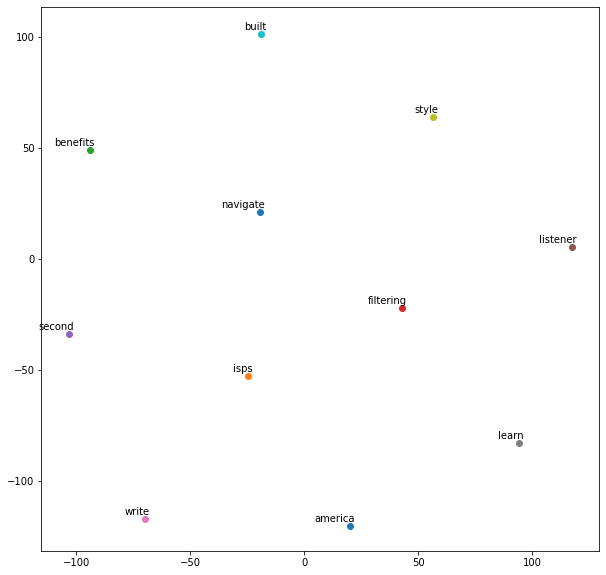

In [20]:
closeWord('america')
